In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### **Loading the requires dataset**


In [4]:
df = pd.read_csv("/content/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
print("Dataset size: ", df.shape)

Dataset size:  (200, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


We can see that there are no null values in the dataset.

In [6]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


As the first column is of no use to us, let's go ahead and drop the column


In [7]:
df.drop(df.columns[0],axis=1,inplace=True)

In [8]:
df.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


###**Exploratory Data Analysis**


**Correlation Matrix:**  A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is between -1 and 1, where:

1 indicates a perfect positive correlation.
0 indicates no correlation.
-1 indicates a perfect negative correlation.

Why It Is Used:
* Identify Relationships
* Feature Selection
* Data Understanding
* Dimensionality Reduction: It can be used in techniques like Principal Component Analysis (PCA) to reduce the number of features while retaining most of the variance in the data.


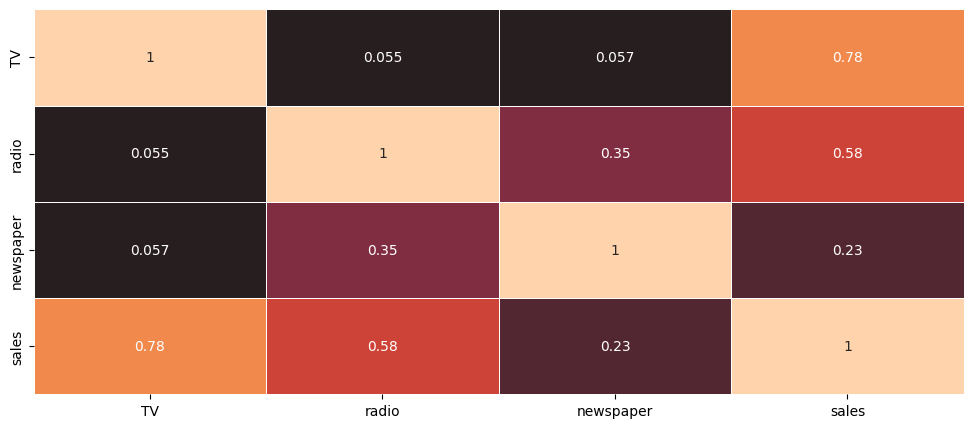

In [9]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            )
plt.show()

**From the above correlation matrix, we can state that Sales and TV have a strong correlation(0.78), with Sales and Radio showing a medium correlation(0.58) whereas Sales and Newspaper are highly uncorrelated(0.23).**

**Feature Importance:** Feature importance enables the assessment of the significance of each input variable in predicting the output variable.

<Axes: >

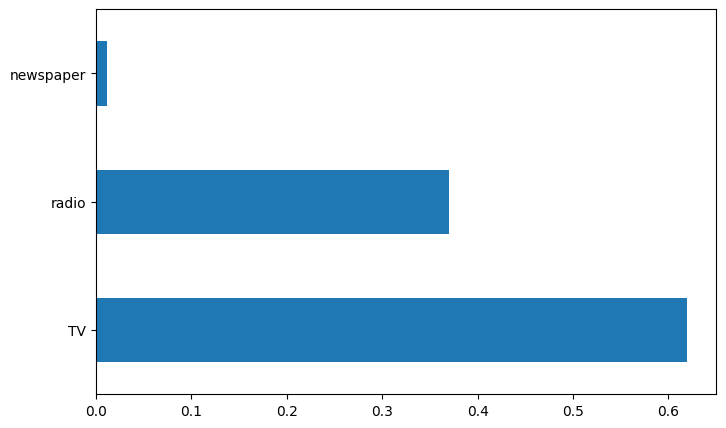

In [10]:
X = df.loc[:, df.columns != 'sales']
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)# Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(8,5))

**Pair Plots:** A pair plot offers a straightforward way to visually explore the connections between different variables.

**This aligns with what we interpreted from the Correlation matrix. TV >>> Radio >>> Newspaper**

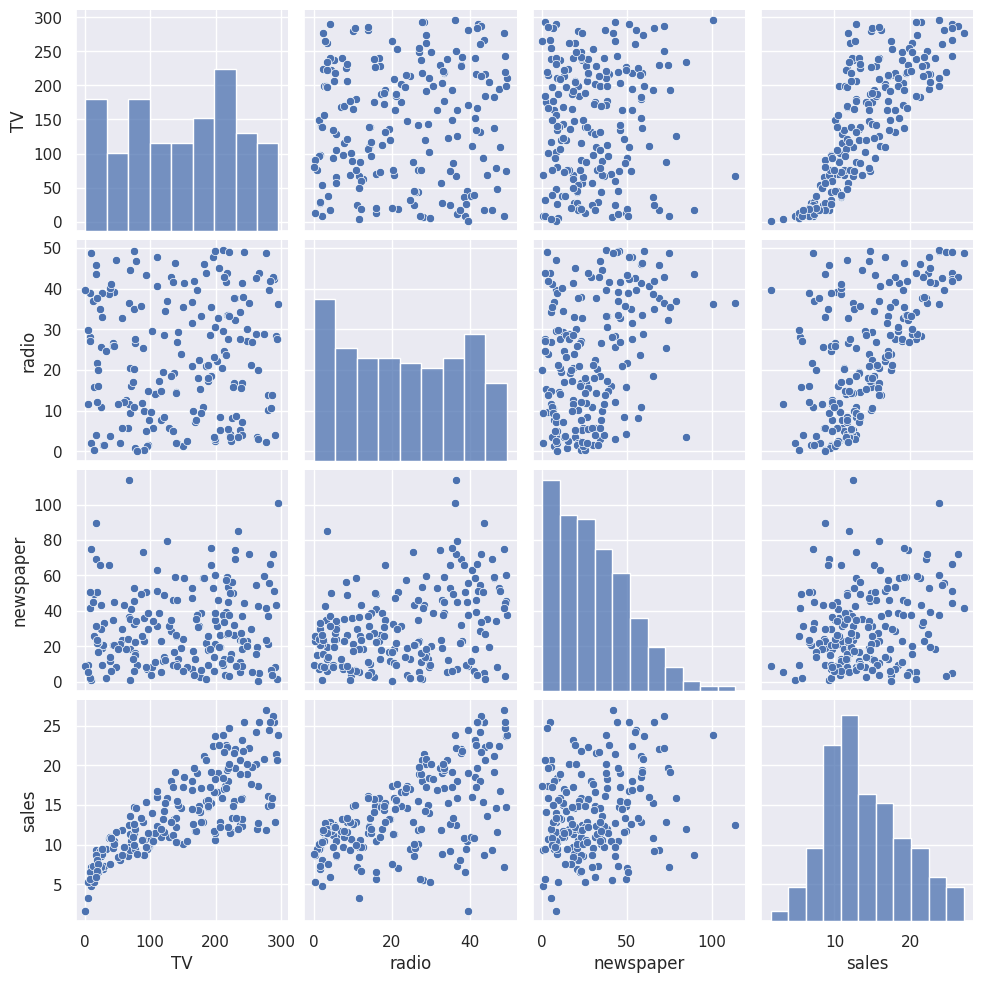

In [11]:
sns.set(rc = {'figure.figsize':(5, 8)})
sns.set(font_scale=1)
sns.pairplot(df)

From this plot, we can state that there is observable coherence between our pair plot and the initial correlation matrix. It indicates a robust positive correlation between TV and sales, a comparatively weaker correlation for radio, and an even lesser correlation for newspapers.

We can also see that the newspaper is right-skewed, let’s try and un-skew it using Box-Cox transformation

**Box - Cox Transformation:** The Box-Cox transformation is used to stabilize variance ,Normalize Data , Improve Linearity and handle Skewness.

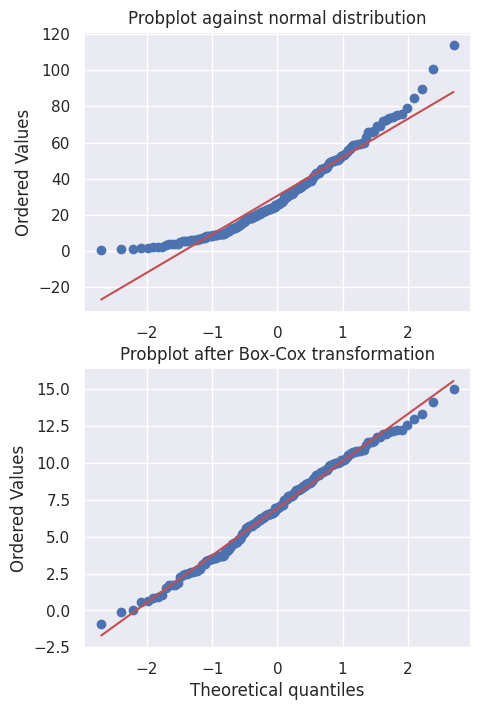

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
x = df['newspaper']
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
#Using boxcox to transform the data so it’s closest to normal distribution
ax2 = fig.add_subplot(212)
df['newspaper'], _ = stats.boxcox(x)
prob = stats.probplot(df['newspaper'], dist=stats.norm, plot=ax2)
print("")
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()

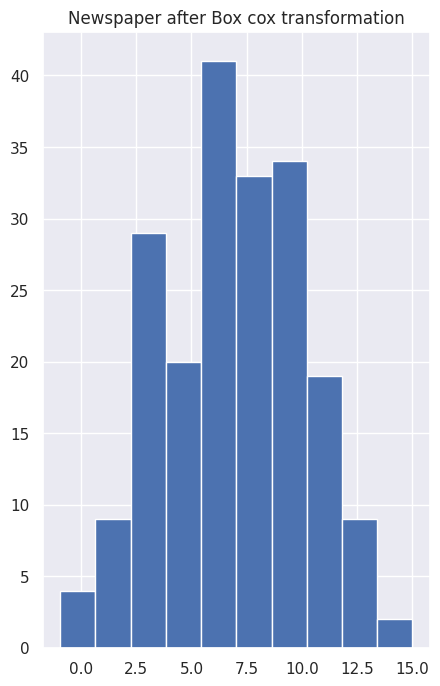

In [13]:
plt.hist(df['newspaper'], bins='auto')
plt.title("Newspaper after Box cox transformation")
plt.show()

After the Box-cox transformation, we can see that the ‘Newspaper’ column data is no more skewed.

**Linear Regression :**
Linear regression is a statistical method that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. It aims to find the best-fitting straight line (or hyperplane in higher dimensions) that minimizes the sum of squared differences between the actual and predicted values.

In [14]:
X = df[["TV","radio",'newspaper']]
y = df.sales
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3)

#variable for Linear Regression model
model = LinearRegression()
model.fit(xtrain,ytrain)
model

LinearRegression()

In [15]:
yPred = model.predict(xtest)
yPred

array([ 8.48388064, 18.93870303, 14.07818618, 12.65775552, 21.96037938,
       14.27759361, 12.38629305,  3.22695179,  6.31300317,  6.3812021 ,
       16.39984957,  9.15562475, 15.16835658, 17.96632266, 10.17529495,
        7.42565685, 13.34254152, 11.36590452, 11.98783745,  7.99923804,
       12.67548466,  7.6590618 , 12.00036926,  8.96188924, 17.52553151,
       17.54686877, 24.65137669, 16.6353649 ,  4.09648767, 17.61196926,
       15.47433191,  5.75124451, 15.13245846,  9.95160228, 11.17140467,
        9.75415401,  8.0462357 , 14.73879904, 14.2612538 , 11.59312628,
       16.08874081, 15.60840804,  5.02939173, 15.08482107,  8.65726122,
       18.16264832, 19.19751907, 10.93243031, 10.03019319,  7.95656944,
       16.59475183,  9.54669284,  6.81183325, 15.64131716, 17.39243962,
       13.50021179, 17.49924191, 16.59447607, 13.95951483, 20.69312716])

In [16]:
result = pd.DataFrame()
result['xtest - tv'] = xtest['TV'].copy()
result['xtest - radio'] = xtest['radio'].copy()
result['ytest'] = ytest.copy()
result['ypred'] = yPred.copy()
result.head()

,xtest - tv,xtest - radio,ytest,ypred
44,25.1,25.7,8.5,8.483881
184,253.8,21.3,17.6,18.938703
83,68.4,44.5,13.6,14.078186
16,67.8,36.6,12.5,12.657756
47,239.9,41.5,23.2,21.960379


In [17]:
print('MAE : ', metrics.mean_absolute_error(ytest,yPred))
print('MSE : ', metrics.mean_squared_error(ytest,yPred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(ytest,yPred)))
print('R-Squared : ', (metrics.r2_score(ytest,yPred))*100)

MAE :  1.4135365465035783
MSE :  3.0972460813117446
RMSE :  1.7598994520459812
R-Squared :  81.14672051382944


An R² value of 80.14% indicates that the model provides a very high level of explanatory power, suggesting that the chosen independent variable(s)(in this case, T.V., radio and newspaper) are effective in predicting the variation observed in the dependent variable (sales of the product). This is a strong indication that the model is a good fit for the data, and the explained variability is significantly high.

In [18]:
cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
print(cdf)

           Coefficients
TV             0.049333
radio          0.184423
newspaper      0.009840
